<a href="https://colab.research.google.com/github/Gift-eiei/CE969-Assignment1/blob/main/CF969_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [12]:
!pip install gurobipy

In [13]:
import numpy as np
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

In [14]:
def generate_data():
  # Generate random data (replace with your registration number digits)
  n = 8
  d1 = 6  # Replace with second-to-last digit of your registration number
  d2 = 9  # Replace with last digit of your registration number

  dummystep = 10*d1+d2

  for _ in range(dummystep):
    dummy = random.uniform(0,1)
  Corr = np.array([[0] * n for _ in range(n)], dtype = float)
  for i in range(n):
    for j in range(n):
      Corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)

  ssigma = np.array([[0]*1 for _ in range(n)], dtype = float)

  ##mmu is the vector μ in the assignment
  mmu = np.array([[0]*1 for _ in range(n)], dtype = float)
  ssigma[0] = 2
  mmu[0] = 3
  for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1

  ddiag = np.array([[0]*n for _ in range(n)], dtype = float)
  np.fill_diagonal(ddiag, ssigma)
  C2 = np.matmul(np.matmul(ddiag,Corr), ddiag)

  # C is the matrix C in the assignment C = 0.5*(C2 + C2.T)
  C = 0.5*(C2 + C2.T)

  return mmu,C,n

In [15]:
#target returns
r_values = np.arange(3.00, 9.25, 0.25)

sigma_values = [] #risk
mu_values = [] #expected return

mmu,C,n = generate_data()

for r in r_values:
    m = gp.Model('portfolio_optimization')
    x = m.addVars(n, lb=0, ub=1, vtype=GRB.CONTINUOUS, name='x')
    m.setObjective(sum(C[i, j] * x[i] * x[j] for i in range(n) for j in range(n)), GRB.MINIMIZE)
    m.addConstr(sum(mmu[i][0] * x[i] for i in range(n)) == r, name='return_constraint')
    m.addConstr(sum(x[i] for i in range(n)) == 1, name='budget_constraint')

    m.optimize()

    if m.status == GRB.OPTIMAL:
        x_opt = {i: x[i].x for i in range(n)}
        sigma = np.sqrt(sum(C[i, j] * x_opt[i] * x_opt[j] for i in range(n) for j in range(n)))
        mu = sum(mmu[i][0] * x_opt[i] for i in range(n))
        sigma_values.append(sigma)
        mu_values.append(mu)
    else:
        print('Optimization failed')

sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 8 columns and 16 nonzeros
Model fingerprint: 0x09a2d7da
Model has 36 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.01s
Presolved: 2 rows, 8 columns, 16 nonzeros
Presolved model has 36 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 7
 AA' NZ     : 3.600e+01
 Factor NZ  : 4.500e+01
 Factor Ops : 2.850e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.63324690e+07 -1.6

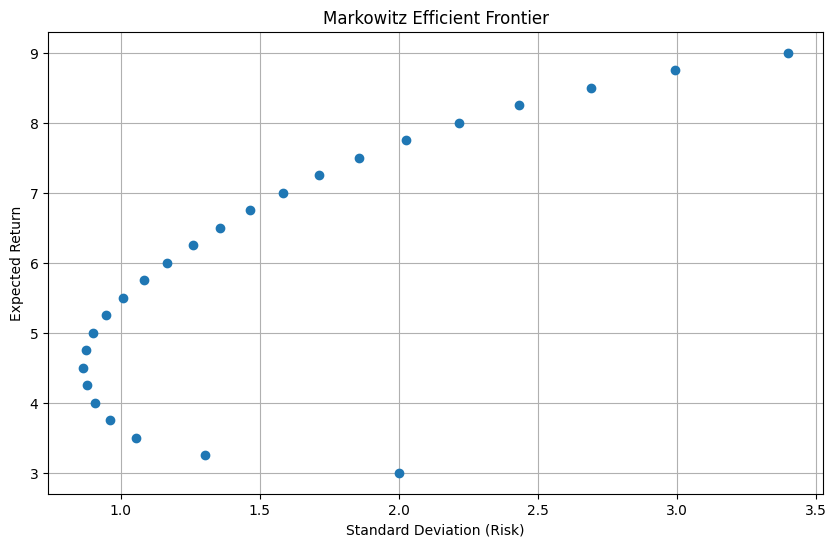

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values,'o')
plt.xlabel('Standard Deviation (Risk)') #sigma
plt.ylabel('Expected Return') #mmu
plt.title('Markowitz Efficient Frontier')
plt.grid(True)
plt.show()

# Task 2

In [17]:
#target returns
r_values = np.arange(3.00, 9.25, 0.25)

sigma_values = [] #risk
mu_values = [] #expected return

mmu,C,n = generate_data()

for r in r_values:
    m = gp.Model('portfolio_optimization')
    x = m.addVars(n, lb=0, ub=1, vtype=GRB.CONTINUOUS, name='x')
    m.setObjective(sum(C[i, j] * x[i] * x[j] for i in range(n) for j in range(n)), GRB.MINIMIZE)
    m.addConstr(sum(mmu[i][0] * x[i] for i in range(n)) == r, name='return_constraint')
    m.addConstr(sum(x[i] for i in range(n)) <= 1, name='budget_constraint')

    m.optimize()

    if m.status == GRB.OPTIMAL:
        x_opt = {i: x[i].x for i in range(n)}
        sigma = np.sqrt(sum(C[i, j] * x_opt[i] * x_opt[j] for i in range(n) for j in range(n)))
        mu = sum(mmu[i][0] * x_opt[i] for i in range(n))
        sigma_values.append(sigma)
        mu_values.append(mu)
    else:
        print('Optimization failed')

sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 8 columns and 16 nonzeros
Model fingerprint: 0xfcda57e7
Model has 36 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.01s
Presolved: 2 rows, 8 columns, 16 nonzeros
Presolved model has 36 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 7
 AA' NZ     : 3.600e+01
 Factor NZ  : 4.500e+01
 Factor Ops : 2.850e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.82871622e+07 -1.8

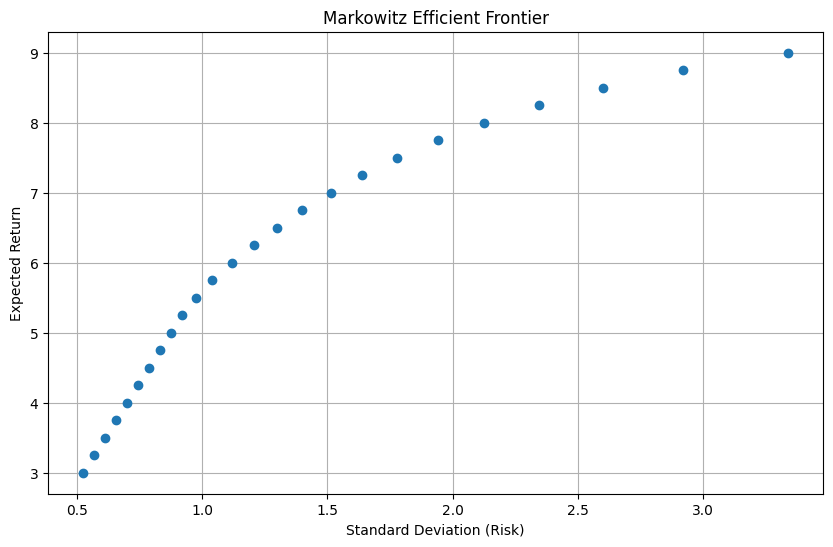

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values,'o')
plt.xlabel('Standard Deviation (Risk)') #sigma
plt.ylabel('Expected Return') #mmu
plt.title('Markowitz Efficient Frontier')
plt.grid(True)
plt.show()

# Task 3

In [19]:
#target returns
r_values = np.arange(3.00, 9.25, 0.25)

sigma_values = [] #risk
mu_values = [] #expected return

mmu,C,n = generate_data()

for r in r_values:
    m = gp.Model('portfolio_optimization')
    x = m.addVars(n, lb=0, ub=1, vtype=GRB.CONTINUOUS, name='x')
    m.setObjective(sum(C[i, j] * x[i] * x[j] for i in range(n) for j in range(n)), GRB.MINIMIZE)
    m.addConstr(sum(mmu[i][0] * x[i] for i in range(n)) >= r, name='return_constraint')
    m.addConstr(sum(x[i] for i in range(n)) == 1, name='budget_constraint')

    m.optimize()

    if m.status == GRB.OPTIMAL:
        x_opt = {i: x[i].x for i in range(n)}
        sigma = np.sqrt(sum(C[i, j] * x_opt[i] * x_opt[j] for i in range(n) for j in range(n)))
        mu = sum(mmu[i][0] * x_opt[i] for i in range(n))
        sigma_values.append(sigma)
        mu_values.append(mu)
    else:
        print('Optimization failed')

sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 8 columns and 16 nonzeros
Model fingerprint: 0x7877af1f
Model has 36 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.01s
Presolved: 2 rows, 8 columns, 16 nonzeros
Presolved model has 36 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 7
 AA' NZ     : 3.600e+01
 Factor NZ  : 4.500e+01
 Factor Ops : 2.850e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.04708670e+07 -3.0

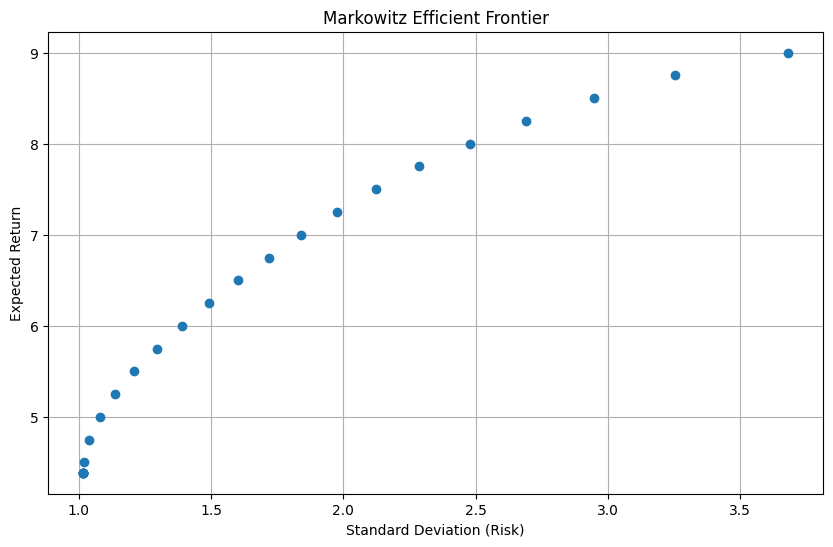

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values,'o')
plt.xlabel('Standard Deviation (Risk)') #sigma
plt.ylabel('Expected Return') #mmu
plt.title('Markowitz Efficient Frontier')
plt.grid(True)
plt.show()

# Task 4

In [21]:
#target returns
r_values = np.arange(3.00, 9.25, 0.25)

sigma_values = [] #risk
mu_values = [] #expected return

mmu,C,n = generate_data()

for r in r_values:
      m = gp.Model('portfolio_optimization')
      x = m.addVars(n, vtype=GRB.CONTINUOUS, name='x')
      m.setObjective(sum(C[i, j] * x[i] * x[j] for i in range(n) for j in range(n)), GRB.MINIMIZE)
      m.addConstr(sum(mmu[i][0] * x[i] for i in range(n)) == r, name='return_constraint')
      m.addConstr(sum(x[i] for i in range(n)) == 1, name='budget_constraint')

      m.optimize()

      if m.status == GRB.OPTIMAL:
          x_opt = {i: x[i].x for i in range(n)}
          sigma = np.sqrt(sum(C[i, j] * x_opt[i] * x_opt[j] for i in range(n) for j in range(n)))
          mu = sum(mmu[i][0] * x_opt[i] for i in range(n))
          sigma_values.append(sigma)
          mu_values.append(mu)
      else:
          print('Optimization failed')

sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 8 columns and 16 nonzeros
Model fingerprint: 0x207676ec
Model has 36 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.01s
Presolved: 2 rows, 8 columns, 16 nonzeros
Presolved model has 36 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 7
 AA' NZ     : 3.600e+01
 Factor NZ  : 4.500e+01
 Factor Ops : 2.850e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.66950683e+07 -2.6

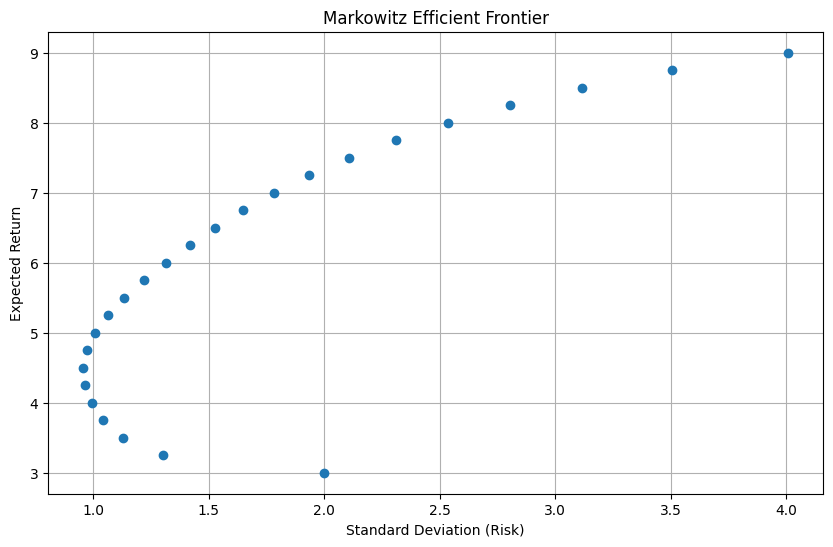

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values,'o')
plt.xlabel('Standard Deviation (Risk)') #sigma
plt.ylabel('Expected Return') #mmu
plt.title('Markowitz Efficient Frontier')
plt.grid(True)
plt.show()